In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [2]:

file_path = r"C:\Users\PENGUIN\Desktop\CODSOFT\CODSOFT\Task2-Movie Rating Prediction With Python\tested2.csv"
df = pd.read_csv(file_path, encoding='latin-1') 


In [3]:

df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [4]:

features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = pd.get_dummies(df[features])
y = df['Rating']


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:

y_pred = model.predict(X_test)

In [9]:

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.00079412353684e+26


Text(0.5, 1.0, 'Actual vs. Predicted Ratings')

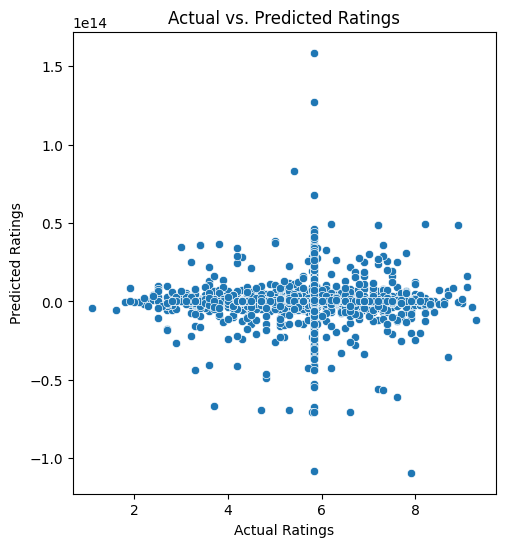

In [10]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')


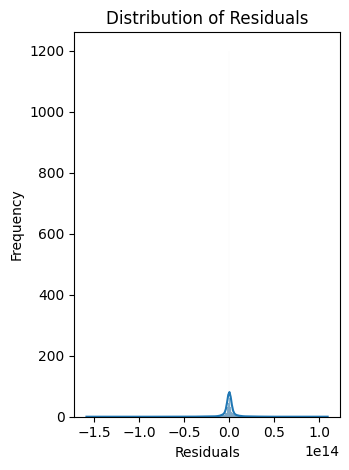

In [11]:
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

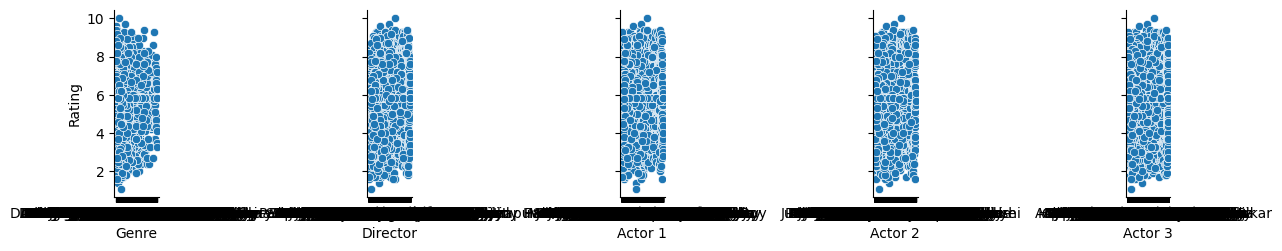

In [12]:
sns.pairplot(df, x_vars=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], y_vars='Rating', kind='scatter')
plt.show()

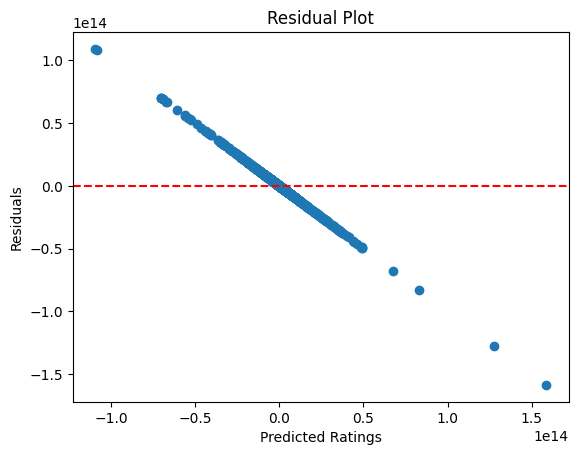

In [13]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [14]:
f_scores, _ = f_regression(X_train_scaled, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)


In [15]:
top_features = 10
print(f'Top {top_features} Important Features:')
print(feature_importance.head(top_features))

Top 10 Important Features:
                             Feature     F-Score
299                      Genre_Drama  121.243404
7527               Actor 1_Dev Anand   76.129077
262                Genre_Documentary   70.400975
0                       Genre_Action   68.361326
7808                 Actor 1_Govinda   59.675526
7921       Actor 1_Himesh Reshammiya   56.022409
409                     Genre_Horror   55.411361
10580           Actor 1_Sunil Shetty   52.523904
15478            Actor 2_Sunny Leone   50.255441
2318   Director_Hrishikesh Mukherjee   49.639341
